In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
pd.option_context('mode.use_inf_as_na', True)


In [2]:
file_path = 'dd/resultats/task_1_8/graph.txt'
df = pd.read_csv(file_path, delim_whitespace=True, header=0)
list_2 = df['RHO_TOT'].values.tolist()
list_1 = df['TAU'].values.tolist()
array = np.column_stack([list_1, list_2])


In [3]:
def find_elbow(data: np.array, theta: float) -> int: 
    '''
    finds the elbow - where data deviates form linear behavior
    returns int index where point is in np.array[:,0]
    '''
    # make rotation matrix
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))

    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)

    # return index of elbow
    return np.where(rotated_vector == rotated_vector[:, 1].min())[0][0]
    
def get_data_radiant(data):
  return np.arctan2(data[:, 1].max() - data[:, 1].min(), 
                    data[:, 0].max() - data[:, 0].min())


In [4]:
theta = get_data_radiant(array)
elbow_index = find_elbow(array, theta)
tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])




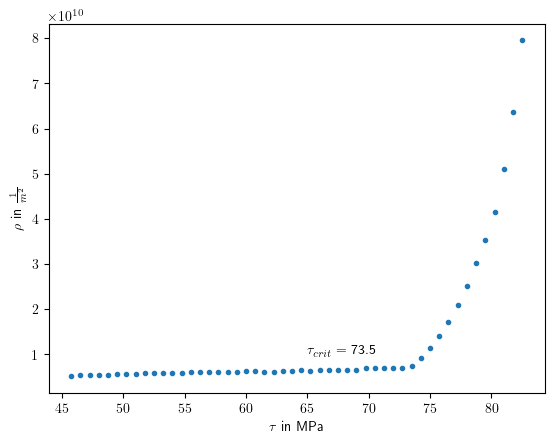

In [5]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
ax.plot(df['TAU'][1:], df['RHO_TOT'][1:], '.')
ax.set_xlabel(r"$\tau$ in MPa")
ax.set_ylabel(r"$\rho$ in $\frac{1}{m^2}$ ")

ax.text(65, 1e10, "\\(\\tau_{crit} =\\) {t_crit}".format(crit='{crit}', t_crit=tau_crit)) #hack to escape key {crit} not found error

fig.savefig('report/graphics/plot_tau_crit_L_100nm')

In [10]:
#extracting of tau_crit from graph_*.txt
base_path = 'dd/resultats/task_2/graph_'
graph_names = ['59_5.txt', '119.txt']

tau_crits_list = []
rho_crits_list = []

for graph_name in graph_names:
    file_path = base_path + graph_name
    df = pd.read_csv(file_path, delim_whitespace=True, header=0)
    list_2 = df['RHO_TOT'].values.tolist()
    list_1 = df['TAU'].values.tolist()
    array = np.column_stack([list_1, list_2])
    theta = get_data_radiant(array)
    elbow_index = find_elbow(array, theta)
    tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])
    tau_crits_list.append(tau_crit)
    rho_crits_list.append(rho_crit)

print(tau_crits_list)


[164.5, 73.5]


In [ ]:
#calculation on theoretical tau_crits
alpha = 0.8158667972575904 #fitted for tau_crit=73.5 MPa L=119 nm
mu = 42 # GPa
b = 2.5525e-10 #m
L = 119e-9 #m
def tau_crit(mu, b, alpha, L):
    return alpha * mu * b / L

In [ ]:
tau_crit_list=[] #in GPa
length_list = [L/2, L, 1.5*L, 2*L] #in m
for L_i in length_list:
    tau_crit_i = tau_crit(mu=mu, b=b, alpha=alpha, L=L_i)
    tau_crit_list.append(tau_crit_i)

In [ ]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
ax.plot(length_list, tau_crit_list, '.')
ax.set_xlabel(r"L in m")
ax.set_ylabel(r"$\tau_{crit}$ in GPa ")